## What to do
2. Proveďte explorativní analýzu zvolené datové sady. Pro každý následující bod implementujte odpovídající sekci ve zdrojovém kódu a zjištěné výsledky popište v dokumentaci:
    - **Pavel** prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)
    - **Pavel** prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.).
    - **Pavel** zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty.
    - proveďte podrobnou analýzu chybějící hodnot (celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.).
    - proveďte korelační analýzu numerických atributů (k analýze využijte i grafy a korelační koeficienty).

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from os import getcwd
import seaborn as sns
sns.set_theme()

### Global definition

In [2]:
data_dir = Path(getcwd()) / "data"

### Analysis of the dataset
- what is the shape of individual provided datasets
- what are the columns
- what are unique data types in the columns
- description of numerical and categorical columns

In [155]:
d1, d2, d3 = [pd.read_csv(f) for f in data_dir.iterdir() if f.suffix == ".csv"]

In [4]:
print(f"Shape: {d1.shape}")
print(f"Columns: {d1.columns}")
print(f"Unique dtypes {pd.unique(d1.dtypes)}")

Shape: (1253, 23)
Columns: Index(['Timestamp', 'Age', 'Gender', 'City', 'Position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Ho

In [5]:
d1.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


As we see from the description of the dataset, there might be some errors in the data frame that a are causing problems with deviation of the values, so we need to drop them

In [196]:
d1.rename(columns={'Yearly brutto salary (without bonus and stocks) in EUR': 'yearly_brutto_salary',
                   'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country': 'yearly_brutto_salary_year_ago',
                   'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week': 'shorten_week'},
                   inplace=True)
d1 = d1[(d1.yearly_brutto_salary < 8e5) & (d1.yearly_brutto_salary_year_ago < 7.5e5)]
d1.describe()

,Age,yearly_brutto_salary,yearly_brutto_salary_year_ago,shorten_week
count,1223.000000,1249.000000,1249.000000,372.000000
mean,32.506132,71028.304243,46999.677342,13.002688
std,5.663194,24350.017897,35198.139618,15.280883
min,20.000000,10001.000000,0.000000,0.000000
25%,29.000000,58000.000000,0.000000,0.000000
50%,32.000000,70000.000000,57000.000000,0.000000
75%,35.000000,80000.000000,72000.000000,30.000000
max,69.000000,300000.000000,230000.000000,40.000000


In [6]:
d1.describe(include="object")

,Timestamp,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly bonus + stocks in EUR,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
count,1253,1243,1253,1247,1237,1221,1241,1126,1096,829,614,1185,1236,1224,1237,1235,1228,1233,462
unique,1248,3,119,148,48,53,24,256,562,168,131,45,11,3,14,5,63,10,59
top,24/11/2020 13:55:19,Male,Berlin,Software Engineer,10,2,Senior,Java,Javascript / Typescript,0,0,30,Full-time employee,Unlimited contract,English,1000+,Product,No,0
freq,2,1049,681,387,138,195,565,184,44,227,200,488,1190,1159,1020,448,760,1162,161


In [7]:
print(f"Shape: {d2.shape}")
print(f"Columns: {d2.columns}")
print(f"Unique dtypes {pd.unique(d2.dtypes)}")

Shape: (765, 14)
Columns: Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience',
       'Your level', 'Current Salary', 'Salary one year ago',
       'Salary two years ago', 'Are you getting any Stock Options?',
       'Main language at work', 'Company size', 'Company type'],
      dtype='object')
Unique dtypes [dtype('O') dtype('float64')]


In [8]:
d2.describe()

,Age,Years of experience,Current Salary,Salary one year ago,Salary two years ago
count,672.000000,732.000000,750.000000,596.000000,463.000000
mean,32.183036,8.548497,68381.765333,62187.278523,58013.475162
std,5.107268,4.729557,21196.306557,20163.008663,20413.048908
min,21.000000,0.000000,10300.000000,10001.000000,10001.000000
25%,29.000000,5.000000,57000.000000,52000.000000,48000.000000
50%,32.000000,8.000000,65000.000000,60000.000000,56000.000000
75%,35.000000,11.000000,75000.000000,70000.000000,67000.000000
max,60.000000,38.000000,200000.000000,200000.000000,150000.000000


In [9]:
d2.describe(include="object")

,Timestamp,Gender,City,Position,Your level,Are you getting any Stock Options?,Main language at work,Company size,Company type
count,765,751,736,737,743,742,750,750,730
unique,761,2,74,397,3,2,7,5,49
top,14/12/2018 12:53:47,M,Berlin,Java Developer,Senior,No,English,100-1000,Product
freq,2,646,291,34,497,587,581,260,451


In [10]:
print(f"Shape: {d3.shape}")
print(f"Columns: {d3.columns}")
print(f"Unique dtypes {pd.unique(d3.dtypes)}")

Shape: (991, 23)
Columns: Index(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Main language at work', 'Company name ', 'Company size',
       'Company type', 'Сontract duration', 'Company business sector', '0'],
      dtype='object')
Unique dtypes [dtype('O') dtype('float64') dtype('int64')]


In [11]:
d3.describe()

,Age,Years of experience,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,0
count,882.000000,991.000000,990.000000,530.000000,203.000000,603.000000,257.000000,139.000000,931.000000,639.000000,0.0
mean,32.416100,8.529768,72562.212121,7857.169811,18263.119803,65803.895522,8144.000000,8204.476331,27.924812,6.462050,NaN
std,5.262496,5.036320,23947.379182,10320.628344,61012.387773,20554.017614,15067.876701,45224.397374,4.482911,15.384601,NaN
min,20.000000,0.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,NaN
25%,29.000000,5.000000,60000.000000,300.000000,1.000000,55000.000000,1000.000000,0.000000,26.000000,2.000000,NaN
50%,32.000000,8.000000,70000.000000,5000.000000,2000.000000,65000.000000,5000.000000,0.100000,28.000000,4.000000,NaN
75%,35.000000,11.000000,80000.000000,10000.000000,20000.000000,75000.000000,9000.000000,3000.000000,30.000000,7.000000,NaN
max,54.000000,30.000000,216000.000000,80000.000000,750000.000000,200000.000000,150000.000000,520000.000000,100.000000,365.000000,NaN


In [12]:
d3.describe(include="object")

,Zeitstempel,Gender,City,Seniority level,Position (without seniority),Your main technology / programming language,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector
count,991,991,991,976,990,977,986,257,977,960,962,846
unique,991,2,76,6,51,42,11,220,5,7,6,52
top,02.12.2019 11:18:26,Male,Berlin,Senior,Backend Developer,Python,English,Zalando,100-1000,Product,unlimited,Сommerce
freq,1,838,430,587,253,205,753,7,366,619,851,205


### Graphical analysis of the dataset

(0.0, 40.0)

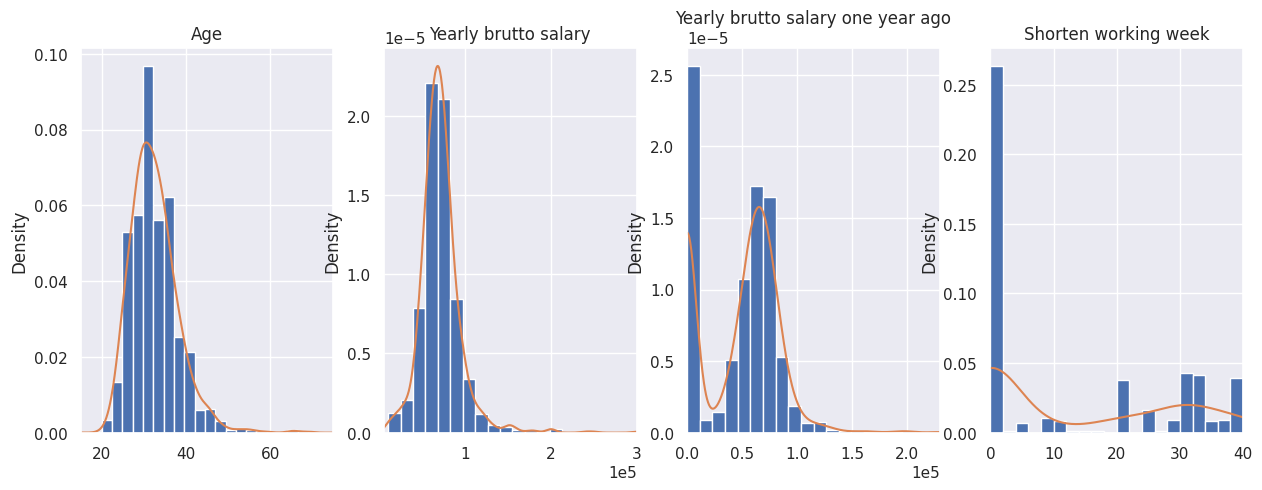

In [208]:
fix, ax = plt.subplots(1, 4, figsize=(15, 5))
# d1.hist(ax=ax)
ax[0].set_title("Age")
d1.Age.hist(bins=20, density=True, ax=ax[0])
d1.Age.plot(kind='kde', ax=ax[0])
ax[0].set_xlim(15, 75)


ax[1].set_title("Yearly brutto salary")
d1.yearly_brutto_salary.hist(ax=ax[1], bins=20, density=True)
d1.yearly_brutto_salary.plot(kind='kde', ax=ax[1])
ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax[1].set_xlim(5e3, d1.yearly_brutto_salary.max())

ax[2].set_title("Yearly brutto salary one year ago")
d1.yearly_brutto_salary_year_ago.hist(ax=ax[2], bins=20, density=True)
d1.yearly_brutto_salary_year_ago.plot(kind='kde', ax=ax[2])
ax[2].set_xlim(0, d1.yearly_brutto_salary_year_ago.max())
ax[2].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax[3].set_title("Shorten working week")
d1.shorten_week.hist(ax=ax[3], bins=20, density=True)
d1.shorten_week.plot(kind='kde', ax=ax[3])
ax[3].set_xlim(0, d1.shorten_week.max())
